In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
book_data = pd.read_csv("books.csv")
book_data.head()

,Unnamed: 0,title,author,rating,voters,price,currency,description,publisher,page_count,generes,ISBN,language,published_date
0,0,Attack on Titan: Volume 13,Hajime Isayama,4.6,428,43.28,SAR,NO SAFE PLACE LEFT At great cost to the Garris...,Kodansha Comics,192,none,9781612626864,English,"Jul 31, 2014"
1,1,Antiques Roadkill: A Trash 'n' Treasures Mystery,Barbara Allan,3.3,23,26.15,SAR,Determined to make a new start in her quaint h...,Kensington Publishing Corp.,288,"Fiction , Mystery &amp, Detective , Cozy , Gen...",9780758272799,English,"Jul 1, 2007"
2,2,The Art of Super Mario Odyssey,Nintendo,3.9,9,133.85,SAR,Take a globetrotting journey all over the worl...,Dark Horse Comics,368,"Games &amp, Activities , Video &amp, Electronic",9781506713816,English,"Nov 5, 2019"
3,3,Getting Away Is Deadly: An Ellie Avery Mystery,Sara Rosett,4.0,10,26.15,SAR,"With swollen feet and swelling belly, pregnant...",Kensington Publishing Corp.,320,none,9781617734076,English,"Mar 1, 2009"
4,4,"The Painted Man (The Demon Cycle, Book 1)",Peter V. Brett,4.5,577,28.54,SAR,The stunning debut fantasy novel from author P...,HarperCollins UK,544,"Fiction , Fantasy , Dark Fantasy",9780007287758,English,"Jan 8, 2009"


In [3]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1299 non-null   int64  
 1   title           1299 non-null   object 
 2   author          1299 non-null   object 
 3   rating          1224 non-null   float64
 4   voters          1224 non-null   object 
 5   price           1299 non-null   float64
 6   currency        1299 non-null   object 
 7   description     1296 non-null   object 
 8   publisher       1299 non-null   object 
 9   page_count      1299 non-null   int64  
 10  generes         1299 non-null   object 
 11  ISBN            1299 non-null   object 
 12  language        1299 non-null   object 
 13  published_date  1299 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 142.2+ KB


In [4]:
book_data.shape

(1299, 14)

In [5]:
print(book_data.isnull().sum())

Unnamed: 0         0
title              0
author             0
rating            75
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64


In [6]:
book_data['rating'].fillna(book_data['rating'].median(), inplace=True)

In [7]:
print(book_data.isnull().sum())

Unnamed: 0         0
title              0
author             0
rating             0
voters            75
price              0
currency           0
description        3
publisher          0
page_count         0
generes            0
ISBN               0
language           0
published_date     0
dtype: int64


Text(0.5, 1.0, 'Top 20 author with number of books')

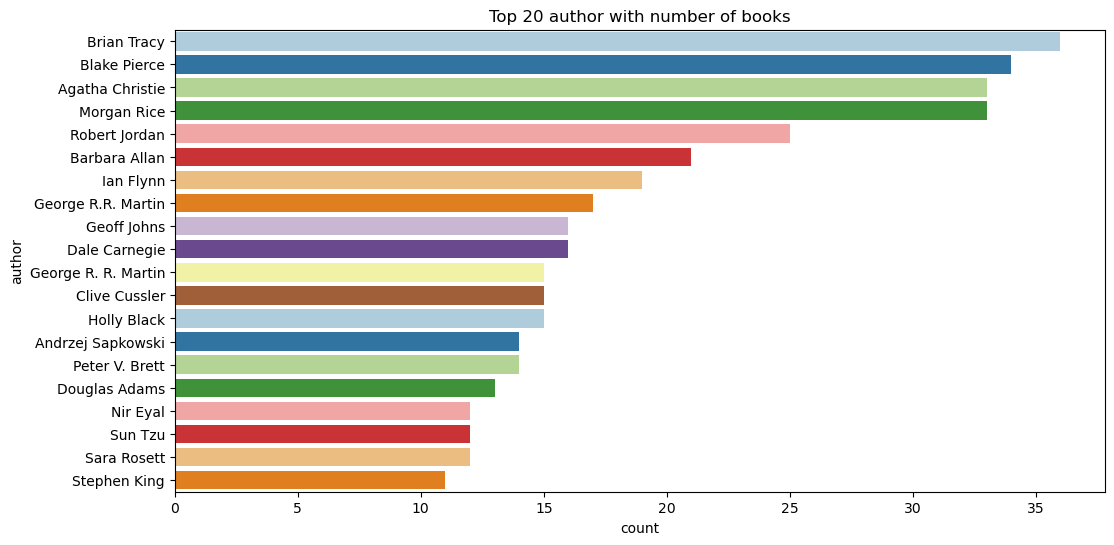

In [8]:
plt.figure(figsize=(12,6))
sns.countplot(y="author",palette = 'Paired', data=book_data,order=book_data['author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

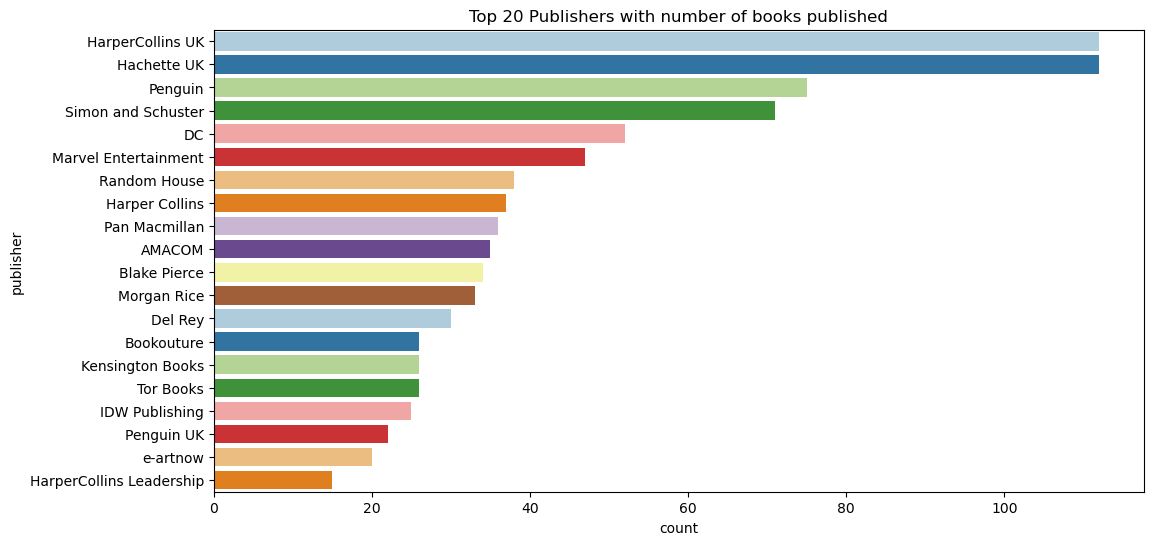

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=book_data,order=book_data['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

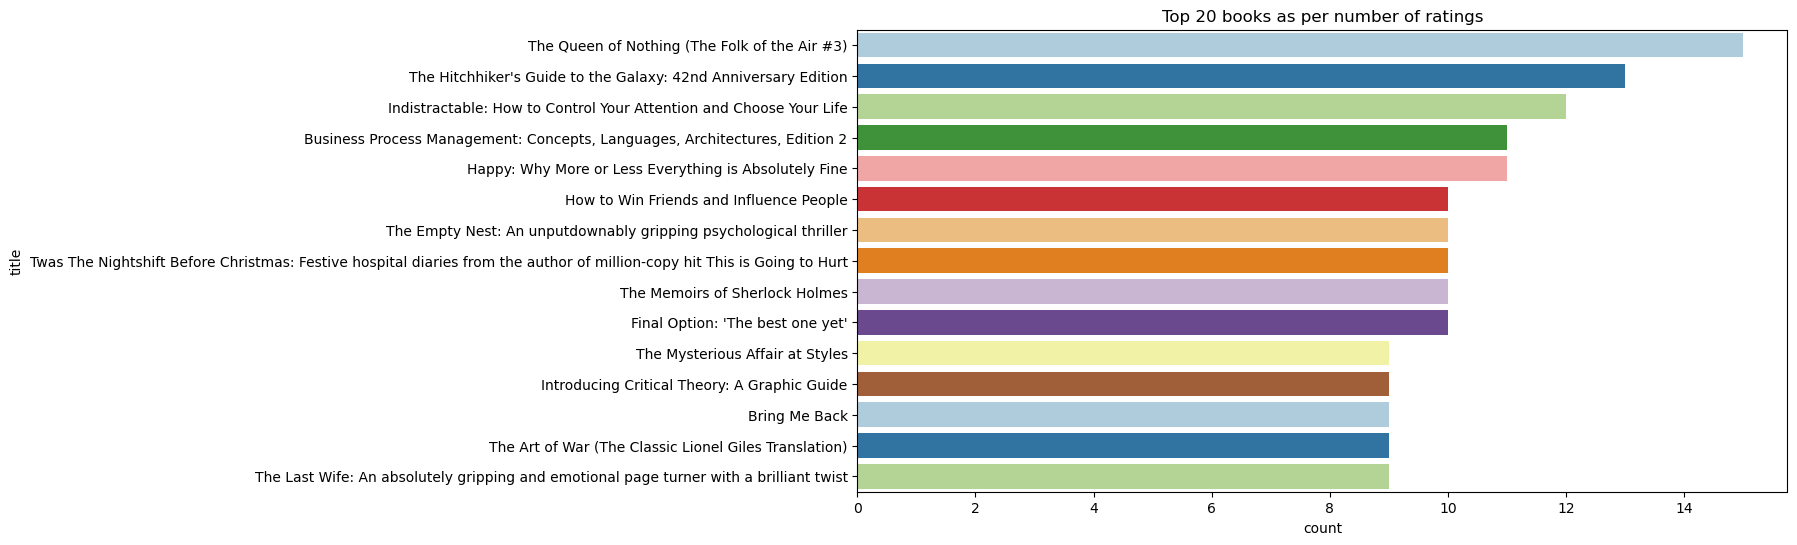

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(y="title",palette = 'Paired',data= book_data, order=book_data['title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
book_data['rating'] = scaler.fit_transform(book_data['rating'].values.reshape(-1, 1))

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(book_data['title'])

X = tfidf_matrix
y = book_data['rating']

rating_model = DecisionTreeRegressor()
rating_model.fit(X, y)

preferred_genre = input("Enter your prefered Generes: ")

for gener in book_data['generes']:
      if preferred_genre in gener:
        genre_books = book_data[book_data['generes'] == gener] 

if genre_books.empty:
    print("No books found in the selected genre.")
    

genre_tfidf = tfidf_vectorizer.transform(genre_books['title'])
similarity_scores = cosine_similarity(genre_tfidf, tfidf_matrix)

top_indices = similarity_scores.argsort(axis=1)[:, -1]

highest_rated_book = None
highest_rating = -1
for index in top_indices:
    if rating_model.predict(X[index])[0] > highest_rating:
        highest_rating = rating_model.predict(X[index])[0]
        highest_rated_book = book_data.iloc[index]['title']
        
print(f"The recommended book in the '{preferred_genre}' genre is: {highest_rated_book}")

Enter your prefered Generes: 
The recommended book in the '' genre is: Final Option: 'The best one yet'


In [12]:
book_data['generes'].unique()


array(['none', 'Fiction , Mystery &amp, Detective , Cozy , General',
       'Games &amp, Activities , Video &amp, Electronic',
       'Fiction , Fantasy , Dark Fantasy', 'Fiction , Media Tie-In',
       'Fiction , Fantasy , Epic',
       'Biography &amp, Autobiography , Medical (incl. Patients)',
       'Fiction , Fantasy , Dragons &amp, Mythical Creatures',
       'Comics &amp, Graphic Novels , Superheroes',
       'Comics & Graphic Novels , Fantasy',
       'Biography &amp, Autobiography , Sports',
       'Fiction , Fantasy , Military',
       'Comics & Graphic Novels , Science Fiction', 'Fiction , Women',
       'Juvenile Fiction , Humorous Stories', 'Fiction , Classics',
       'Business &amp, Economics , Motivational',
       'Social Science , General',
       'Fiction , Science Fiction , Action &amp, Adventure',
       'Fiction , Mystery &amp, Detective , General',
       'Fiction , Mystery &amp, Detective , Women Sleuths',
       'Fiction , Noir', 'Business &amp, Economics , Lea

In [14]:
#Refference
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
book_data['rating'] = scaler.fit_transform(book_data['rating'].values.reshape(-1, 1))

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(book_data['title'])

X = tfidf_matrix
y = book_data['rating']

rating_model = DecisionTreeRegressor()
rating_model.fit(X, y)

def recommend_highest_rated_book(preferred_genre):
    genre_books = book_data[book_data['generes'] == preferred_genre]
    print(book_data[book_data['generes'] == preferred_genre])

    if genre_books.empty:
        return "No books found in the selected genre."

    genre_tfidf = tfidf_vectorizer.transform(genre_books['description'])
    similarity_scores = cosine_similarity(genre_tfidf, tfidf_matrix)

    top_indices = similarity_scores.argsort(axis=1)[:, -1]

    highest_rated_book = None
    highest_rating = -1
    for index in top_indices:
        if rating_model.predict(X[index])[0] > highest_rating:
            highest_rating = rating_model.predict(X[index])[0]
            highest_rated_book = data.iloc[index]['title']

    return highest_rated_book

preferred_genre = "Computers , Data Processing"
recommended_book = recommend_highest_rated_book(preferred_genre)

if recommended_book:
    print(f"The highest-rated book in the '{preferred_genre}' genre is: {recommended_book}")
else:
    print("No books found in the selected genre.")


     Unnamed: 0                                              title  \
883         883  Business Process Management: Concepts, Languag...   

            author    rating voters   price currency  \
883  Mathias Weske -5.060088      2  265.39      SAR   

                                           description  \
883  Business process management is usually treated...   

                             publisher  page_count  \
883  Springer Science & Business Media         404   

                         generes           ISBN language published_date  
883  Computers , Data Processing  9783642286162  English    May 3, 2012  
No books found in the selected genre.
